In [1]:
#Import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import pickle

In [2]:
# This utility was created because students were getting confused when they ran 
# their notebooks twice, the previous write-to-file code would do nothing and say  
# nothing. The students thought the file was over-written when in fact, it was not -
# generating hidden bugs in subsequent notebooks.

def save_file(data, fname, dname):
    """Save a datafile (data) to a specific location (dname) and filename (fname)
    
    Currently valid formats are limited to CSV or PKL."""
    
    if not os.path.exists(dname):
        os.mkdir(dname)
        print(f'Directory {dname} was created.')
        
    fpath = os.path.join(dname, fname)
    
    
    if os.path.exists(fpath):
        print("A file already exists with this name.\n")

        yesno = None
        while yesno != "Y" and yesno != "N":
            yesno = input('Do you want to overwrite? (Y/N)').strip()[0].capitalize()
            if yesno == "Y":
                print(f'Writing file.  "{fpath}"')
                _save_file(data, fpath)
                break  # Not required
            elif yesno == "N":
                print('\nPlease re-run this cell with a new filename.')
                break  # Not required
            else:
                print('\nUnknown input, please enter "Y" or "N".')

    else:  # path does not exist, ok to save the file
        print(f'Writing file.  "{fpath}"')
        _save_file(data, fpath)
        
                
def _save_file(data, fpath):
    valid_ftypes = ['.csv', '.pkl']
    
    assert (fpath[-4:] in valid_ftypes), "Invalid file type.  Use '.csv' or '.pkl'"

    # Figure out what kind of file we're dealing with by name
    if fpath[-3:] == 'csv':
        data.to_csv(fpath, index=False)
    elif fpath[-3:] == 'pkl':
        with open(fpath, 'wb') as f:
            pickle.dump(data, f)

## Load The Microsoft Malware Prediction Data<a id='Load_The_Microsoft_Malware_Prediction_Data'></a>

In [3]:
# Generate random sample data
# NB: data will be different each time generated since its randomly samppling the rows
np.random.seed(1234)
filename = ".../microsoft-malware-prediction/train.csv"
n = sum(1 for line in open(filename)) - 1 #number of records in file (excludes header)
s = 10000 #desired sample size
skip = sorted(random.sample(range(1,n+1),n-s)) #the 0-indexed header will not be included in the skip list
df = pd.read_csv(filename, skiprows=skip)

In [4]:
# Call the info method to see a summary of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 83 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   MachineIdentifier                                  10000 non-null  object 
 1   ProductName                                        10000 non-null  object 
 2   EngineVersion                                      10000 non-null  object 
 3   AppVersion                                         10000 non-null  object 
 4   AvSigVersion                                       10000 non-null  object 
 5   IsBeta                                             10000 non-null  int64  
 6   RtpStateBitfield                                   9969 non-null   float64
 7   IsSxsPassiveMode                                   10000 non-null  int64  
 8   DefaultBrowsersIdentifier                          530 non-null    float64
 9   AVProdu

We can already see some features are missing values. Glancing through, `PuaMode` has 4 entries.

In [5]:
# Call the head method to print a few rows
df.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0005cf71899e085957a2edae8fe526fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1729.0,0,7.0,0,NaN,53447.0,...,12416.0,1,0.0,0.0,1,0,0.0,0.0,11.0,0
1,00126dc1e66484610dbaefbf0393ba99,win8defender,1.1.15200.1,4.12.16299.15,1.275.821.0,0,0.0,0,NaN,53447.0,...,19889.0,0,NaN,0.0,0,0,0.0,0.0,1.0,1
2,001345eb59ba23c5a239fcd475a70105,win8defender,1.1.15200.1,4.18.1807.18075,1.275.434.0,0,7.0,0,NaN,53447.0,...,51823.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
3,00138aac65c4856e83585e1d7383a8f8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.848.0,0,7.0,0,NaN,53447.0,...,33120.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1
4,00148210c708bd977aa48bdff5af7a29,mse,1.1.15000.2,4.10.209.0,1.271.1016.0,0,7.0,0,NaN,29199.0,...,19982.0,0,NaN,0.0,0,0,0.0,0.0,13.0,0


In [6]:
# Set index to 'MachineIdentifier'
df = df.set_index('MachineIdentifier')
df.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,...,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
0005cf71899e085957a2edae8fe526fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1729.0,0,7.0,0,NaN,53447.0,1.0,...,12416.0,1,0.0,0.0,1,0,0.0,0.0,11.0,0
00126dc1e66484610dbaefbf0393ba99,win8defender,1.1.15200.1,4.12.16299.15,1.275.821.0,0,0.0,0,NaN,53447.0,1.0,...,19889.0,0,NaN,0.0,0,0,0.0,0.0,1.0,1
001345eb59ba23c5a239fcd475a70105,win8defender,1.1.15200.1,4.18.1807.18075,1.275.434.0,0,7.0,0,NaN,53447.0,1.0,...,51823.0,0,0.0,0.0,0,0,0.0,0.0,1.0,1
00138aac65c4856e83585e1d7383a8f8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.848.0,0,7.0,0,NaN,53447.0,1.0,...,33120.0,1,0.0,0.0,0,0,0.0,1.0,8.0,1
00148210c708bd977aa48bdff5af7a29,mse,1.1.15000.2,4.10.209.0,1.271.1016.0,0,7.0,0,NaN,29199.0,1.0,...,19982.0,0,NaN,0.0,0,0,0.0,0.0,13.0,0


## Explore The Data<a id='Explore_The_Data'></a>

Count the number of missing values in each column

In [7]:
# function to calculate percentage of missing values
# for each column
def missing_values_pct(df):
    pd.options.display.max_rows = 100 # number of rows to print since we have more columns
    missing = pd.concat([df.isnull().sum(), 100 * df.isnull().mean()], axis=1)
    missing.columns = ['count', '%']
    sorted_ms = missing.sort_values(by='%', ascending=False)
    return sorted_ms

In [8]:
# check missing values per feature 
missing_values_pct(df)

,count,%
PuaMode,9996,99.96
Census_ProcessorClass,9968,99.68
DefaultBrowsersIdentifier,9470,94.70
Census_IsFlightingInternal,8359,83.59
Census_InternalBatteryType,7072,70.72
Census_ThresholdOptIn,6322,63.22
Census_IsWIMBootEnabled,6317,63.17
SmartScreen,3601,36.01
OrganizationIdentifier,3142,31.42
SMode,600,6.00


`PuaMode` has almost 100% missing values. Unfortunately we have other 6 features with over 50% missing values which raises some questions about the data and needs to be investigated further(we did sample the rows randomly). Thankfully our target variable `HasDetections` has no missing values.

In [9]:
# Select columns with all nonzeros
non_zero_col = df.loc[:, df.all()]
non_zero_col.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0005cf71899e085957a2edae8fe526fc to fffd03de8777a716e117ec14c97b952c
Data columns (total 57 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ProductName                                        10000 non-null  object 
 1   EngineVersion                                      10000 non-null  object 
 2   AppVersion                                         10000 non-null  object 
 3   AvSigVersion                                       10000 non-null  object 
 4   DefaultBrowsersIdentifier                          530 non-null    float64
 5   AVProductStatesIdentifier                          9954 non-null   float64
 6   AVProductsInstalled                                9954 non-null   float64
 7   CountryIdentifier                                  10000 non-null  int64  
 8   CityIdentifier                   

In [10]:
# Select columns without NaN's
df_col_nonnan = df.loc[:, df.notnull().all()]
df_col_nonnan.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,LocaleEnglishNameIdentifier,Platform,...,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
0005cf71899e085957a2edae8fe526fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1729.0,0,0,1,159,75,windows10,...,31,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,Retail,1,1,0,0
00126dc1e66484610dbaefbf0393ba99,win8defender,1.1.15200.1,4.12.16299.15,1.275.821.0,0,0,1,195,75,windows10,...,31,UNKNOWN,0,IS_GENUINE,Volume:GVLK,Retail,0,0,0,1
001345eb59ba23c5a239fcd475a70105,win8defender,1.1.15200.1,4.18.1807.18075,1.275.434.0,0,0,1,107,134,windows10,...,83,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,Retail,0,0,0,1
00138aac65c4856e83585e1d7383a8f8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.848.0,0,0,1,93,64,windows10,...,30,Notify,0,IS_GENUINE,OEM:DM,Retail,1,0,0,1
00148210c708bd977aa48bdff5af7a29,mse,1.1.15000.2,4.10.209.0,1.271.1016.0,0,0,0,207,75,windows7,...,31,FullAuto,0,OFFLINE,Retail,Unknown,0,0,0,0


There are 41 columns without NaN's and that's roughly about 50% of the total columns. This is a great concern for the other variables that have missing values and needs to be investigated further.

In [11]:
df_col_nonnan.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0005cf71899e085957a2edae8fe526fc to fffd03de8777a716e117ec14c97b952c
Data columns (total 41 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   ProductName                       10000 non-null  object
 1   EngineVersion                     10000 non-null  object
 2   AppVersion                        10000 non-null  object
 3   AvSigVersion                      10000 non-null  object
 4   IsBeta                            10000 non-null  int64 
 5   IsSxsPassiveMode                  10000 non-null  int64 
 6   HasTpm                            10000 non-null  int64 
 7   CountryIdentifier                 10000 non-null  int64 
 8   LocaleEnglishNameIdentifier       10000 non-null  int64 
 9   Platform                          10000 non-null  object
 10  Processor                         10000 non-null  object
 11  OsVer                      

In [12]:
# Filter only 'object' columns
df_object = df.select_dtypes('object')

In [13]:
df_object.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,Platform,Processor,OsVer,OsPlatformSubRelease,OsBuildLab,SkuEdition,...,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
0005cf71899e085957a2edae8fe526fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1729.0,windows10,x64,10.0.0.0,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Pro,...,10.0.16299.547,amd64,rs3_release_svc_escrow,ProfessionalEducation,PROFESSIONAL,Upgrade,AutoInstallAndRebootAtMaintenanceTime,IS_GENUINE,Retail,Retail
00126dc1e66484610dbaefbf0393ba99,win8defender,1.1.15200.1,4.12.16299.15,1.275.821.0,windows10,x64,10.0.0.0,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Pro,...,10.0.16299.611,amd64,rs3_release_svc_escrow,Professional,PROFESSIONAL,IBSClean,UNKNOWN,IS_GENUINE,Volume:GVLK,Retail
001345eb59ba23c5a239fcd475a70105,win8defender,1.1.15200.1,4.18.1807.18075,1.275.434.0,windows10,x64,10.0.0.0,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,...,10.0.16299.547,amd64,rs3_release_svc_escrow,Core,CORE,Upgrade,AutoInstallAndRebootAtMaintenanceTime,IS_GENUINE,Retail,Retail
00138aac65c4856e83585e1d7383a8f8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.848.0,windows10,x64,10.0.0.0,rs3,16299.15.amd64fre.rs3_release.170928-1534,Home,...,10.0.16299.371,amd64,rs3_release,CoreSingleLanguage,CORE_SINGLELANGUAGE,Upgrade,Notify,IS_GENUINE,OEM:DM,Retail
00148210c708bd977aa48bdff5af7a29,mse,1.1.15000.2,4.10.209.0,1.271.1016.0,windows7,x64,6.1.1.0,windows7,7601.18247.amd64fre.win7sp1_gdr.130828-1532,Invalid,...,10.0.16299.15,amd64,rs3_release,Professional,PROFESSIONAL,Upgrade,FullAuto,OFFLINE,Retail,Unknown


In [14]:
# Filter only 'non object' columns
df_nonobject = df.loc[:, df.dtypes == np.int64]
df_nonobject.head()

,IsBeta,IsSxsPassiveMode,HasTpm,CountryIdentifier,LocaleEnglishNameIdentifier,OsBuild,OsSuite,AutoSampleOptIn,Census_HasOpticalDiskDrive,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSUILocaleIdentifier,Census_IsPortableOperatingSystem,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,
0005cf71899e085957a2edae8fe526fc,0,0,1,159,75,16299,256,0,0,16299,547,31,0,1,1,0,0
00126dc1e66484610dbaefbf0393ba99,0,0,1,195,75,16299,256,0,0,16299,611,31,0,0,0,0,1
001345eb59ba23c5a239fcd475a70105,0,0,1,107,134,16299,768,0,0,16299,547,83,0,0,0,0,1
00138aac65c4856e83585e1d7383a8f8,0,0,1,93,64,16299,768,0,0,16299,371,30,0,1,0,0,1
00148210c708bd977aa48bdff5af7a29,0,0,0,207,75,7601,256,0,0,16299,15,31,0,0,0,0,0


In [15]:
df_nonobject.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 0005cf71899e085957a2edae8fe526fc to fffd03de8777a716e117ec14c97b952c
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype
---  ------                            --------------  -----
 0   IsBeta                            10000 non-null  int64
 1   IsSxsPassiveMode                  10000 non-null  int64
 2   HasTpm                            10000 non-null  int64
 3   CountryIdentifier                 10000 non-null  int64
 4   LocaleEnglishNameIdentifier       10000 non-null  int64
 5   OsBuild                           10000 non-null  int64
 6   OsSuite                           10000 non-null  int64
 7   AutoSampleOptIn                   10000 non-null  int64
 8   Census_HasOpticalDiskDrive        10000 non-null  int64
 9   Census_OSBuildNumber              10000 non-null  int64
 10  Census_OSBuildRevision            10000 non-null  int64
 11  Census_OSUILocaleIdentifier       10000 

17 columns are classified as being integers but most of them actually are categories that we need to look at convert and to their respective dtypes.

In [16]:
# Different ProductNames with their values
df['ProductName'].value_counts()

win8defender    9909
mse               91
Name: ProductName, dtype: int64

There are over 9000 windows defender installations and just over 100 microsoft security essentials installation. Something we can explore is how many of the `MachineIdentifiers` had these running on them.

In [17]:
# How many devices actually had antivirus or some kind of anitivirus or were protected
df['IsProtected'].value_counts()

1.0    9437
0.0     517
Name: IsProtected, dtype: int64

Almost 95% of the devices had some kind of antivirus and were highly protected.

In [18]:
# Distribution of the target variable
df['HasDetections'].value_counts()

0    5133
1    4867
Name: HasDetections, dtype: int64

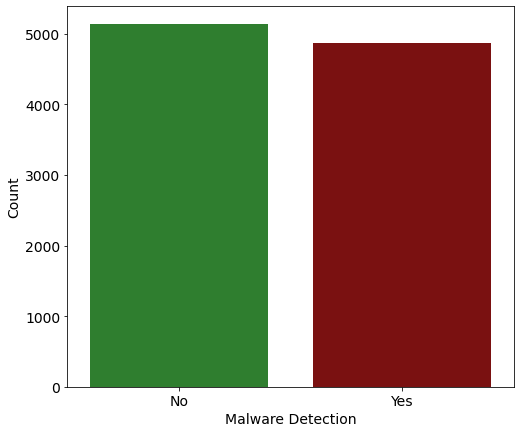

In [19]:
plt.figure(figsize=(8,7))
sns.countplot(x='HasDetections', data=df, palette=['forestgreen', 'darkred'])
plt.xticks([0,1], ['No', 'Yes'], fontsize= 14, color='black')
plt.yticks(fontsize= 14, color='black')
plt.xlabel('Malware Detection', fontsize=14, color='black')
plt.ylabel('Count',fontsize=14, color='black')
plt.show()

We seem to have a fair distribution of our target variable and obviously imbalance is not an issue at this point.

In [20]:
# Calculate the number of unique values
# in each of the following features
df[['ProductName', 'OsVer', 'OsPlatformSubRelease', 'Census_DeviceFamily', 'CountryIdentifier']].nunique()

ProductName               2
OsVer                     4
OsPlatformSubRelease      9
Census_DeviceFamily       2
CountryIdentifier       196
dtype: int64

In [21]:
# Distribution of FormFactor by disk space
df_disksize = df.groupby('Census_MDC2FormFactor')['Census_PrimaryDiskTotalCapacity'].agg(['max','mean'])
df_disksize.sort_values(['max', 'mean'], ascending=[False, False])

,max,mean
Census_MDC2FormFactor,,
Desktop,3815447.0,499055.447539
Notebook,2861588.0,543967.584879
PCOther,2861588.0,208392.013245
AllInOne,1907729.0,670378.183607
Convertible,1907729.0,486093.270330
Detachable,974848.0,111129.641667
SmallServer,953869.0,302137.222222
LargeTablet,715404.0,87568.123457
MediumServer,307200.0,293113.333333


In [22]:
# Drop columns with missing values using a threshold
# Drop any column with more than 30% missing values
threshold = len(df) * 0.70
df1 = df.dropna(thresh=threshold, axis=1)

In [23]:
df1.shape # Out of 82, 73 columns remaining

(10000, 73)

In [24]:
# Check how many columns still has missing values
missing_values_pct(df1)

,count,%
SMode,600,6.00
Wdft_RegionIdentifier,376,3.76
Wdft_IsGamer,376,3.76
CityIdentifier,333,3.33
Census_InternalBatteryNumberOfCharges,294,2.94
Census_FirmwareManufacturerIdentifier,237,2.37
Census_FirmwareVersionIdentifier,210,2.10
Census_IsFlightsDisabled,188,1.88
Census_OEMModelIdentifier,114,1.14
Census_OEMNameIdentifier,108,1.08


In [25]:
# Drop rows with missing values
df2 = df1.dropna()
df2.head()

,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,...,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
MachineIdentifier,,,,,,,,,,,,,,,,,,,,,
0005cf71899e085957a2edae8fe526fc,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1729.0,0,7.0,0,53447.0,1.0,1.0,...,142.0,12416.0,1,0.0,1,0,0.0,0.0,11.0,0
00126dc1e66484610dbaefbf0393ba99,win8defender,1.1.15200.1,4.12.16299.15,1.275.821.0,0,0.0,0,53447.0,1.0,1.0,...,355.0,19889.0,0,0.0,0,0,0.0,0.0,1.0,1
001345eb59ba23c5a239fcd475a70105,win8defender,1.1.15200.1,4.18.1807.18075,1.275.434.0,0,7.0,0,53447.0,1.0,1.0,...,142.0,51823.0,0,0.0,0,0,0.0,0.0,1.0,1
00138aac65c4856e83585e1d7383a8f8,win8defender,1.1.15100.1,4.18.1807.18075,1.273.848.0,0,7.0,0,53447.0,1.0,1.0,...,554.0,33120.0,1,0.0,0,0,0.0,1.0,8.0,1
001b088ea56e7c6fe6f93d3922c5157a,win8defender,1.1.15100.1,4.18.1807.18075,1.273.975.0,0,0.0,1,35801.0,2.0,1.0,...,142.0,46575.0,0,0.0,0,0,0.0,1.0,1.0,0


In [26]:
# Check how many columns still has missing values
# in the new dataframe
missing_values_pct(df2)

,count,%
ProductName,0,0.0
Census_PrimaryDiskTypeName,0,0.0
Census_OSSkuName,0,0.0
Census_OSEdition,0,0.0
Census_OSBuildRevision,0,0.0
Census_OSBuildNumber,0,0.0
Census_OSBranch,0,0.0
Census_OSArchitecture,0,0.0
Census_OSVersion,0,0.0
Census_InternalBatteryNumberOfCharges,0,0.0


In [27]:
df2['HasDetections'].value_counts()

0    4105
1    3978
Name: HasDetections, dtype: int64

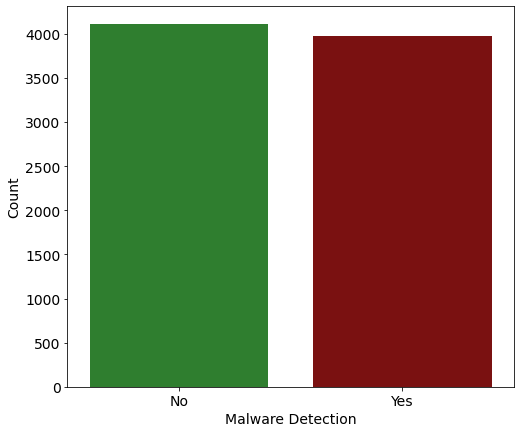

In [28]:
plt.figure(figsize=(8,7))
sns.countplot(x='HasDetections', data=df2, palette=['forestgreen', 'darkred'])
plt.xticks([0,1], ['No', 'Yes'], fontsize= 14, color='black')
plt.yticks(fontsize= 14, color='black')
plt.xlabel('Malware Detection', fontsize=14, color='black')
plt.ylabel('Count',fontsize=14, color='black')
plt.show()

After removing columns and rows with missing values, we still have a fair distribution of our target variable.

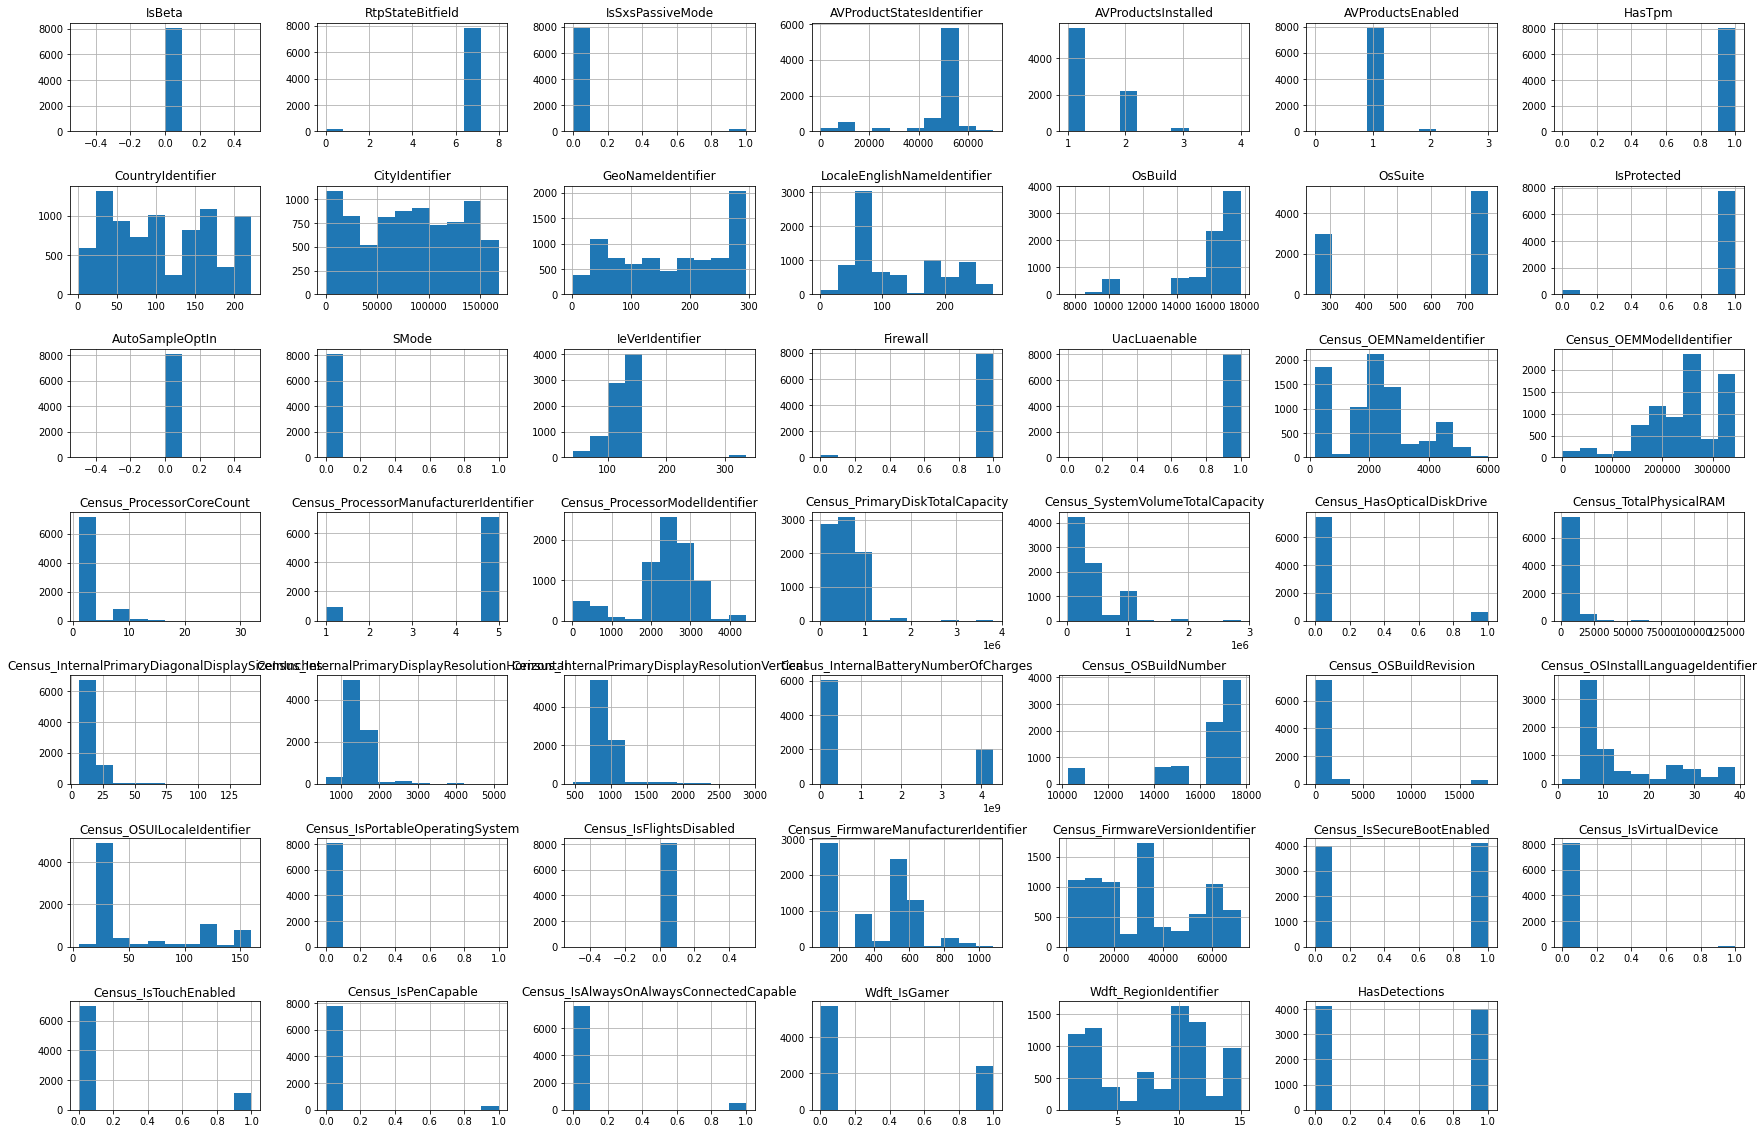

In [29]:
# Distribution of feature values
df2.hist(figsize=(30,20))
plt.subplots_adjust(hspace=0.5);

Text(0.5, 1.0, 'Distribution of Primary Disk Capacity')

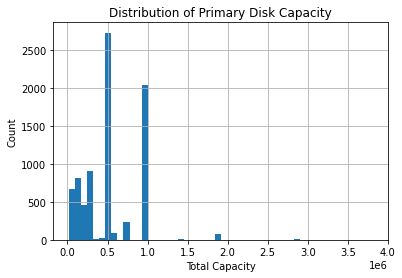

In [30]:
# Distribution of hard disk capacity
df2.Census_PrimaryDiskTotalCapacity.hist(bins=50)
plt.xlabel('Total Capacity')
plt.ylabel('Count')
plt.title('Distribution of Primary Disk Capacity')

In [35]:
# Different windows version in our dataframe
df2['Census_OSEdition'].value_counts()

Core                     3215
Professional             2786
CoreSingleLanguage       1734
CoreCountrySpecific       169
ProfessionalEducation      50
Education                  39
Enterprise                 36
ProfessionalN              29
EnterpriseS                15
Cloud                       4
CoreN                       3
EducationN                  3
Name: Census_OSEdition, dtype: int64

In [36]:
df2.groupby(['Platform','IsProtected']).size().reset_index(name='count')

,Platform,IsProtected,count
0,windows10,0.0,320
1,windows10,1.0,7680
2,windows7,1.0,5
3,windows8,0.0,3
4,windows8,1.0,75


Windows10 devices had the most protection(had some kind of antivirus installed)

In [37]:
# Count of different microsoft editions with some kind of antivirus 
# installed and those without
df2.groupby(['Census_OSEdition', 'IsProtected']).size().reset_index(name='count')

,Census_OSEdition,IsProtected,count
0,Cloud,1.0,4
1,Core,0.0,118
2,Core,1.0,3097
3,CoreCountrySpecific,0.0,2
4,CoreCountrySpecific,1.0,167
5,CoreN,1.0,3
6,CoreSingleLanguage,0.0,97
7,CoreSingleLanguage,1.0,1637
8,Education,1.0,39
9,EducationN,1.0,3


In [ ]:
# save the data to a new csv file
datapath = '.../Capstone/Capstone Project2/'
save_file(df2, 'mc_malware_cleaned.csv', datapath)